In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential

In [15]:
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 76s 7us/step


In [92]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(80,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,722 (256.73 KB)

 Trainable params: 65,722 (256.73 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam")

In [95]:
history = model.fit(X_train,y_train,epochs =10,validation_split=0.2)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4.0640
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4244
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2060
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1674
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1384
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1057
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0941


In [96]:
preds =model.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step


array([[4.4580098e-05, 2.5693167e-10, 1.4165104e-10, ..., 9.9990427e-01,
        4.2526571e-07, 4.8769652e-05],
       [3.8109845e-12, 1.0110975e-05, 9.9998772e-01, ..., 3.0946157e-09,
        7.4054239e-13, 1.9479485e-17],
       [1.6060416e-33, 9.9996936e-01, 8.6608765e-10, ..., 4.6886539e-10,
        1.3524220e-11, 1.4063078e-10],
       ...,
       [8.3631547e-14, 1.8739105e-15, 1.1326861e-12, ..., 9.3871976e-17,
        9.3971903e-18, 5.8791917e-05],
       [1.2288947e-09, 1.3581209e-24, 3.8355432e-22, ..., 1.2690019e-17,
        6.1853225e-20, 1.3476822e-14],
       [1.2315387e-13, 1.4671025e-15, 2.2583360e-16, ..., 2.0601968e-30,
        1.9278084e-22, 3.0526045e-27]], dtype=float32)

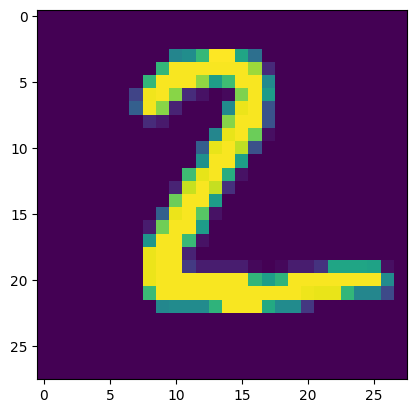

In [97]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [98]:
preds[0][7]

0.9999043

In [99]:
a=[]
a.append(0)
a

[0]

In [100]:
predictions=[]
for i in range(preds.shape[0]):
    max=0
    index=0
    for j in range(preds.shape[1]):
        if max<preds[i][j]:
            max=preds[i][j]
            index=j
    predictions.append(index)
predictions

        




[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 3,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [101]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,predictions)
score

0.9634